# Proyecto Equipo 5
# Uso del Módulo 2 - Procesamiento de datos con Python
## Exploración, limpieza y unificación de fuentes de datos.

### Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Leer datos

In [2]:
df_application = pd.read_csv('../archive/application_record.csv')
df_application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
df_credit = pd.read_csv('../archive/credit_record.csv')
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


### Exploración de "application_record.csv"

In [4]:
#Información de los datos
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
#Estadísticas descriptivas básicas
df_application.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [6]:
#Verificación de cantidad de valores únicos
df_application.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Density'>

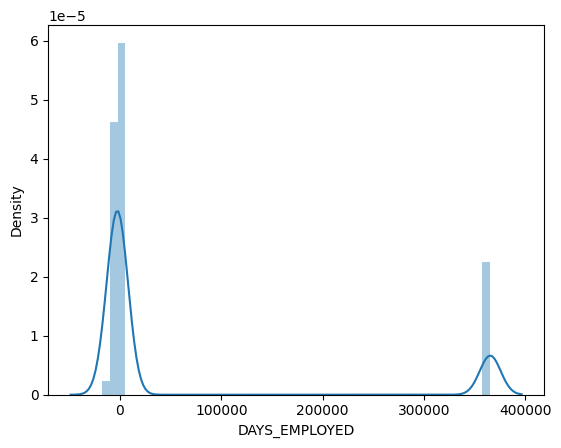

In [7]:
#Verificación del máximo de "DAYS EMPLOYED"
#(Es positivo, cuando la descripción de la base de datos indica valores negativos)
sns.distplot(df_application['DAYS_EMPLOYED'])

In [8]:
#Explorar los valores positivos de DAYS_EMPLOYED
days_employed_positivos = pd.DataFrame(list(filter(lambda x: x >= 0, df_application['DAYS_EMPLOYED'])))
num_days_employed_positivos = days_employed_positivos.count()
unique_days_employed_positivos = np.unique(days_employed_positivos)
print(f'Conteo de DAYS_EMPLOYED positivos: {num_days_employed_positivos}\nValores únicos de DAYS_EMPLOYED: {unique_days_employed_positivos}')

Conteo de DAYS_EMPLOYED positivos: 0    75329
dtype: int64
Valores únicos de DAYS_EMPLOYED: [365243]


### Limpieza de "application_record.csv"

In [9]:
#Existen 438557 renglones en el DataFrame, pero sólo 438510 ID únicos
#Ordenamiento de ID
df_application_sorted = df_application.sort_values(by=['ID'],ascending=True)
#Verificación de repetidos
repetidos_df_application = df_application_sorted[df_application_sorted.duplicated(subset=['ID'], keep=False)]
repetidos_df_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
426818,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
425023,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
431911,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
431545,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
426488,7023108,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-17590,-1273,1,0,0,0,Cleaning staff,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
428620,7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
423702,7838075,F,Y,Y,0,315000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10698,-1659,1,0,0,1,NaN,1.0


In [10]:
#Eliminación de repetidos
df_application_sorted = df_application_sorted.drop_duplicates("ID",keep="first")
df_application = df_application_sorted.reset_index(drop=True)
#Verificación de la eliminación de repetidos
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438510 entries, 0 to 438509
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [11]:
#Revisión del DataFrame
df_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,7999660,F,N,N,0,90000.0,State servant,Higher education,Single / not married,House / apartment,-13432,-5446,1,0,0,0,Core staff,1.0
438506,7999696,F,N,Y,2,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-12576,-4382,1,0,0,0,Medicine staff,4.0
438507,7999738,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-9970,-119,1,0,0,0,NaN,2.0
438508,7999784,F,Y,Y,1,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10630,-454,1,0,0,0,NaN,3.0


In [12]:
#Verificación de la existencia de NaN y su ubicación.
num_NaN_columnas = df_application.isna().sum(axis=0)
num_NaN_renglones = df_application.isna().sum(axis=1)
num_NaN_total = df_application.isna().sum(axis=1).sum()
print(f'NaN en columnas:\n{num_NaN_columnas}\n\nNaN en renglones:\n{num_NaN_renglones}\n\nNaN total:\n{num_NaN_total}')

NaN en columnas:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134192
CNT_FAM_MEMBERS             0
dtype: int64

NaN en renglones:
0         1
1         1
2         0
3         0
4         0
         ..
438505    0
438506    0
438507    1
438508    1
438509    0
Length: 438510, dtype: int64

NaN total:
134192


In [13]:
#Cambiar NaN por Unspecified
df_application_new = df_application
df_application_new['OCCUPATION_TYPE'] = df_application_new['OCCUPATION_TYPE'].fillna('Unspecified')
num_NaN_total = df_application.isna().sum(axis=1).sum()
print(f'Total de NaN: {num_NaN_total}')

Total de NaN: 0


In [14]:
#Homologar formato de los campos a 0 y 1 en lugar de 'Y' y 'N'
df_application_new['FLAG_OWN_CAR'] = list(map(lambda x: 0 if x == 'N' else 1, df_application['FLAG_OWN_CAR']))
df_application_new['FLAG_OWN_REALTY'] = list(map(lambda x: 0 if x == 'N' else 1, df_application['FLAG_OWN_REALTY']))
df_application_new

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unspecified,2.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unspecified,2.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,7999660,F,0,0,0,90000.0,State servant,Higher education,Single / not married,House / apartment,-13432,-5446,1,0,0,0,Core staff,1.0
438506,7999696,F,0,1,2,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-12576,-4382,1,0,0,0,Medicine staff,4.0
438507,7999738,M,0,1,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-9970,-119,1,0,0,0,Unspecified,2.0
438508,7999784,F,1,1,1,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10630,-454,1,0,0,0,Unspecified,3.0


<Axes: xlabel='DAYS_EMPLOYED', ylabel='Density'>

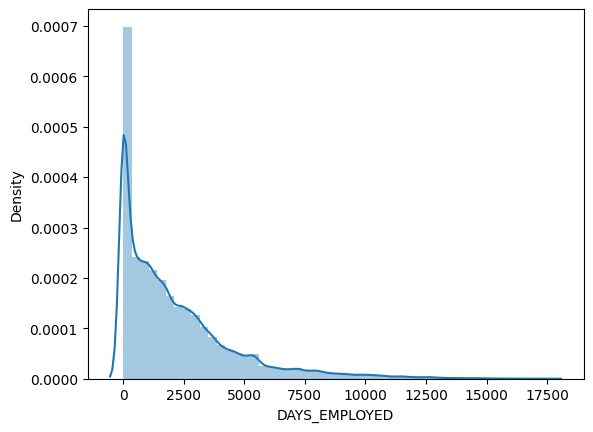

In [15]:
#Cambiar los valores positivos (valor 365243) de 'DAYS_EMPLOYED' por cero
df_application_new['DAYS_EMPLOYED'] = np.where(df_application['DAYS_EMPLOYED'] > 0, 0, df_application_new['DAYS_EMPLOYED'])
#Cambio de valores negativos por positivos
df_application_new['DAYS_EMPLOYED'] = np.multiply(df_application_new['DAYS_EMPLOYED'], -1)
#Verificacion
sns.distplot(df_application_new['DAYS_EMPLOYED'])

In [16]:
#Cambio en 'DAYS_EMPLOYED' de días a meses
months_employed = list(map(lambda x: int(x/30),df_application_new['DAYS_EMPLOYED']))
df_application_new['MONTHS_EMPLOYED'] = months_employed
df_application_new[['DAYS_EMPLOYED','MONTHS_EMPLOYED']].describe()

,DAYS_EMPLOYED,MONTHS_EMPLOYED
count,438510.000000,438510.000000
mean,2172.516041,72.019564
std,2397.462014,79.838360
min,0.000000,0.000000
25%,371.000000,12.000000
50%,1467.000000,48.000000
75%,3103.000000,103.000000
max,17531.000000,584.000000


In [17]:
#Cambio en 'DAYS_BIRTH' de días a años
age = df_application_new['DAYS_BIRTH'].abs()
age_years = list(map(lambda x: int(x/365),age))
df_application_new['AGE_YEARS'] = age_years
df_application_new[['DAYS_BIRTH','AGE_YEARS']].describe()

,DAYS_BIRTH,AGE_YEARS
count,438510.000000,438510.000000
mean,-15997.946163,43.326604
std,4185.073262,11.467615
min,-25201.000000,20.000000
25%,-19484.000000,34.000000
50%,-15630.000000,42.000000
75%,-12514.000000,53.000000
max,-7489.000000,69.000000


In [18]:
#Eliminar las columnas 'DAYS_BIRTH' y 'DAYS_EMPLOYED'
df_application = df_application_new.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED'])
df_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_EMPLOYED,AGE_YEARS
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unspecified,2.0,151,32
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unspecified,2.0,151,32
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,37,58
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,101,52
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,101,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,7999660,F,0,0,0,90000.0,State servant,Higher education,Single / not married,House / apartment,1,0,0,0,Core staff,1.0,181,36
438506,7999696,F,0,1,2,135000.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,0,0,Medicine staff,4.0,146,34
438507,7999738,M,0,1,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Unspecified,2.0,3,27
438508,7999784,F,1,1,1,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Unspecified,3.0,15,29


### Exploración de datos "application_record.csv" limpios

In [19]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438510 entries, 0 to 438509
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  int64  
 3   FLAG_OWN_REALTY      438510 non-null  int64  
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  FLAG_MOBIL           438510 non-null  int64  
 11  FLAG_WORK_PHONE      438510 non-null  int64  
 12  FLAG_PHONE           438510 non-null  int64  
 13  FLAG_EMAIL           438510 non-null  int64  
 14  OCCUPATION_TYPE      438510 non-null  object 
 15  CNT_FAM_MEMBERS  

In [20]:
val_CODE_GENDER = df_application['CODE_GENDER'].unique()
val_NAME_INCOME_TYPE = df_application['NAME_INCOME_TYPE'].unique()
val_NAME_EDUCATION_TYPE = df_application['NAME_EDUCATION_TYPE'].unique()
val_NAME_FAMILY_STATUS = df_application['NAME_FAMILY_STATUS'].unique()
val_NAME_HOUSING_TYPE = df_application['NAME_HOUSING_TYPE'].unique()
val_OCCUPATION_TYPE = df_application['OCCUPATION_TYPE'].unique()
print(f'Los valores de las variables categóricas son los siguientes:\n\n\
--CODE_GENDER: {val_CODE_GENDER}\n\
--NAME_INCOME_TYPE:{val_NAME_INCOME_TYPE}\n\
--NAME_EDUCATION_TYPE:{val_NAME_EDUCATION_TYPE}\n\
--NAME_FAMILY_STATUS:{val_NAME_FAMILY_STATUS}\n\
--NAME_HOUSING_TYPE:{val_NAME_HOUSING_TYPE}\n\
--OCCUPATION_TYPE:{val_OCCUPATION_TYPE}')

Los valores de las variables categóricas son los siguientes:

--CODE_GENDER: ['M' 'F']
--NAME_INCOME_TYPE:['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
--NAME_EDUCATION_TYPE:['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
--NAME_FAMILY_STATUS:['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
--NAME_HOUSING_TYPE:['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
--OCCUPATION_TYPE:['Unspecified' 'Security staff' 'Sales staff' 'Accountants' 'Laborers'
 'Managers' 'Drivers' 'Core staff' 'High skill tech staff'
 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'Medicine staff' 'Secretaries'
 'Waiters/barmen staff' 'HR staff' 'Realty agents' 'IT staff']


In [21]:
#Estadísticas descriptivas básicas de variables numéricas
df_application.describe()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_EMPLOYED,AGE_YEARS
count,4.385100e+05,438510.000000,438510.000000,438510.000000,4.385100e+05,438510.0,438510.000000,438510.000000,438510.000000,438510.000000,438510.000000,438510.000000
mean,6.022035e+06,0.371900,0.693355,0.427388,1.875220e+05,1.0,0.206137,0.287765,0.108205,2.194456,72.019564,43.326604
std,5.714962e+05,0.483313,0.461101,0.724887,1.100826e+05,0.0,0.404530,0.452722,0.310640,0.897210,79.838360,11.467615
min,5.008804e+06,0.000000,0.000000,0.000000,2.610000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000
25%,5.609362e+06,0.000000,0.000000,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,34.000000
50%,6.047720e+06,0.000000,1.000000,0.000000,1.607805e+05,1.0,0.000000,0.000000,0.000000,2.000000,48.000000,42.000000
75%,6.454161e+06,1.000000,1.000000,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,103.000000,53.000000
max,7.999952e+06,1.000000,1.000000,19.000000,6.750000e+06,1.0,1.000000,1.000000,1.000000,20.000000,584.000000,69.000000


### Guardar la base de datos application_record limpia

In [22]:
df_application.to_csv('../archive/application_record_OK.csv')

### Exploración de "credit_record.csv"

In [23]:
#Información de los datos
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [24]:
#Estadísticas descriptivas básicas
df_credit.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [25]:
#Verificación de NaN
num_NaN_total = df_credit.isna().sum(axis=1).sum()
num_NaN_total

0

In [26]:
#Verificación de cantidad de valores únicos
df_credit.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [27]:
#Valores ID únicos
ID_con_historial = df_credit['ID'].unique()
num_ID_con_historial = ID_con_historial.shape
print(f'Exiten {num_ID_con_historial[0]} ID con historial  y son:\n{ID_con_historial}')

Exiten 45985 ID con historial  y son:
[5001711 5001712 5001713 ... 5150484 5150485 5150487]


In [28]:
#Valores únicos de 'MONTHS_BALANCE' y 'STATUS'
val_MONTHS_BALANCE = df_credit['MONTHS_BALANCE'].unique()
val_STATUS = df_credit['STATUS'].unique()
print(f'Los valores de las variables son los siguientes:\n\n\
	--MONTHS_BALANCE: {val_MONTHS_BALANCE}\n\
	--STATUS: {val_STATUS}')
#Valores categóricos de 'STATUS'
#0: 1-29 days past due
#1: 30-59 days past due
#2: 60-89 days overdue
#3: 90-119 days overdue
#4: 120-149 days overdue
#5: Overdue or bad debts, write-offs for more than 150 days
#C: paid off that month
#X: No loan for the month

Los valores de las variables son los siguientes:

	--MONTHS_BALANCE: [  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60]
	--STATUS: ['X' '0' 'C' '1' '2' '3' '4' '5']


In [29]:
#Estadísticas descriptivas básicas por ID
df_historico = df_credit.groupby('ID')
df_historico.describe()

MONTHS_BALANCE                                                 
                 count  mean        std   min    25%   50%    75%   max
ID                                                                     
5001711            4.0  -1.5   1.290994  -3.0  -2.25  -1.5  -0.75   0.0
5001712           19.0  -9.0   5.627314 -18.0 -13.50  -9.0  -4.50   0.0
5001713           22.0 -10.5   6.493587 -21.0 -15.75 -10.5  -5.25   0.0
5001714           15.0  -7.0   4.472136 -14.0 -10.50  -7.0  -3.50   0.0
5001715           60.0 -29.5  17.464249 -59.0 -44.25 -29.5 -14.75   0.0
...                ...   ...        ...   ...    ...   ...    ...   ...
5150482           18.0 -19.5   5.338539 -28.0 -23.75 -19.5 -15.25 -11.0
5150483           18.0  -8.5   5.338539 -17.0 -12.75  -8.5  -4.25   0.0
5150484           13.0  -6.0   3.894440 -12.0  -9.00  -6.0  -3.00   0.0
5150485            2.0  -0.5   0.707107  -1.0  -0.75  -0.5  -0.25   0.0
5150487           30.0 -14.5   8.803408 -29.0 -21.75 -14.5  -7.25   0.0

[45985 rows x 8 columns]

In [30]:
#Expandir el DataFrame horizontalmente por 'ID'
df_credit_large = df_credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
df_credit_large.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,C,C,C,C,C,C,C,C,C
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X


In [31]:
#Adición de campos con mayor información

#Hace cuántos meses aperturó el crédito
df_credit_large['open_account_month'] = df_historico['MONTHS_BALANCE'].min()
#Hace cuantos meses cerró el crédito o si sigue vigente (0)
df_credit_large['end_account_month'] = df_historico['MONTHS_BALANCE'].max()
#Tiempo que lleva con el crédito
df_credit_large['timespan'] = df_credit_large['end_account_month'] - df_credit_large['open_account_month'] + 1
#Conteo de las categorías de STATUS por ID
	#0: 1-29 days past due
	#1: 30-59 days past due
	#2: 60-89 days overdue
	#3: 90-119 days overdue
	#4: 120-149 days overdue
	#5: Overdue or bad debts, write-offs for more than 150 days
	#C: paid off that month
	#X: No loan for the month
df_credit_large['class C'] = df_credit_large[df_credit_large.iloc[:,0:61] == 'C'].count(axis = 1)
df_credit_large['class 0'] = df_credit_large[df_credit_large.iloc[:,0:61] == '0'].count(axis = 1)
df_credit_large['class 1'] = df_credit_large[df_credit_large.iloc[:,0:61] == '1'].count(axis = 1)
df_credit_large['class 2'] = df_credit_large[df_credit_large.iloc[:,0:61] == '2'].count(axis = 1)
df_credit_large['class 3'] = df_credit_large[df_credit_large.iloc[:,0:61] == '3'].count(axis = 1)
df_credit_large['class 4'] = df_credit_large[df_credit_large.iloc[:,0:61] == '4'].count(axis = 1)
df_credit_large['class 5'] = df_credit_large[df_credit_large.iloc[:,0:61] == '5'].count(axis = 1)
df_credit_large['class X'] = df_credit_large[df_credit_large.iloc[:,0:61] == 'X'].count(axis = 1)

df_credit_large.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,end_account_month,timespan,class C,class 0,class 1,class 2,class 3,class 4,class 5,class X
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,4,0,3,0,0,0,0,0,1
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,19,9,10,0,0,0,0,0,0
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,22,0,0,0,0,0,0,0,22
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,15,0,0,0,0,0,0,0,15
5001715,NaN,X,X,X,X,X,X,X,X,X,...,0,60,0,0,0,0,0,0,0,60


### Guardar la base de datos credit_record en formato horizontal

In [32]:
df_credit_large.to_csv('../archive/credit_record_large.csv')

### Unificación de ambas bases de datos

In [33]:
#Coincidencias en bases de datos
verificar_IDs = df_application['ID'].isin(ID_con_historial)
resultados_coincidencias = df_application[verificar_IDs]
num_verificar_IDs = resultados_coincidencias['ID'].count()
print(f'De {num_ID_con_historial[0]} IDs en credit_record, hay {num_verificar_IDs} en application_record')

De 45985 IDs en credit_record, hay 36457 en application_record


In [34]:
#Selección de campos
df_hist_to_merge = pd.DataFrame(df_credit_large[['timespan','class C','class 0','class 1','class 2','class 3','class 4','class 5','class X']])
df_hist_to_merge.columns = ["timespan","paid_off","pastdue_1-29","pastdue_30-59","pastdue_60-89","pastdue_90-119","pastdue_120-149","pastdue_over_150","no_loan"]
df_hist_to_merge

,timespan,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan
ID,,,,,,,,,
5001711,4,0,3,0,0,0,0,0,1
5001712,19,9,10,0,0,0,0,0,0
5001713,22,0,0,0,0,0,0,0,22
5001714,15,0,0,0,0,0,0,0,15
5001715,60,0,0,0,0,0,0,0,60
...,...,...,...,...,...,...,...,...,...
5150482,18,6,12,0,0,0,0,0,0
5150483,18,0,0,0,0,0,0,0,18
5150484,13,1,12,0,0,0,0,0,0


In [35]:
#Unificación en inner join
df_merged = pd.merge(df_application,df_hist_to_merge,on='ID')
df_merged.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,AGE_YEARS,timespan,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,32,16,13,1,1,0,0,0,0,1
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,32,15,12,1,1,0,0,0,0,1
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,58,30,7,7,0,0,0,0,0,16
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,52,5,0,2,0,0,0,0,0,3
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,52,5,0,0,0,0,0,0,0,5


In [36]:
#Verificación de NaN
num_NaN_total = df_merged.isna().sum(axis=1).sum()
num_NaN_total

0

In [37]:
#Info del DataFrame
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  FLAG_MOBIL           36457 non-null  int64  
 11  FLAG_WORK_PHONE      36457 non-null  int64  
 12  FLAG_PHONE           36457 non-null  int64  
 13  FLAG_EMAIL           36457 non-null  int64  
 14  OCCUPATION_TYPE      36457 non-null  object 
 15  CNT_FAM_MEMBERS      36457 non-null 

### Guardar datos unificados

In [38]:
df_merged.to_csv('../archive/application_credit_record.csv')